# PARTICLE PHYSICS PROBLEM USING MACHINE LEARNING

In this project we will be solving a cutting edge Particle Physics problem using Deep Neural Network

Dr. Nick Kersting presenting a machine learning model on the neurothink platform with hints and instructions regarding his data science approach and implementation.

### Standard Model of Elementary Particles
Everything in this universe constitute of this standard particles each having different properties like Mass, Charge, Spin, Parity, Hypercharge, etc.

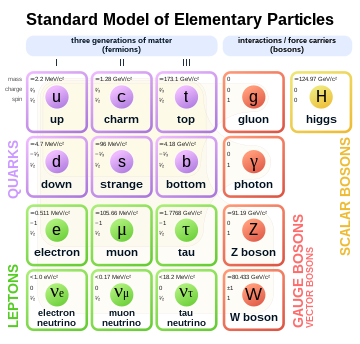

The Standard Model of particle physics is the theory describing three of the four known fundamental forces (electromagnetic, weak and strong interactions) excluding gravity in the universe and classifying all known elementary particles. It was developed in stages throughout the latter half of the 20th century, through the work of many scientists worldwide, with the current formulation being finalized in the mid-1970s upon experimental confirmation of the existence of quarks. Since then, proof of the top quark (1995), the tau neutrino (2000), and the Higgs boson (2012) have added further credence to the Standard Model. In addition, the Standard Model has predicted various properties of weak neutral currents and the W and Z bosons with great accuracy.

Although the Standard Model is believed to be theoretically self-consistent and has demonstrated huge successes in providing experimental predictions, it leaves some phenomena unexplained. It falls short of being a complete theory of fundamental interactions. For example, it does not fully explain baryon asymmetry, incorporate the full theory of gravitation as described by general relativity, or account for the universe's accelerating expansion as possibly described by dark energy. The model does not contain any viable dark matter particle that possesses all of the required properties deduced from observational cosmology. It also does not incorporate neutrino oscillations and their non-zero masses.

The development of the Standard Model was driven by theoretical and experimental particle physicists alike. The Standard Model is a paradigm of a quantum field theory for theorists, exhibiting a wide range of phenomena, including spontaneous symmetry breaking, anomalies, and non-perturbative behavior. It is used as a basis for building more exotic models that incorporate hypothetical particles, extra dimensions, and elaborate symmetries (such as supersymmetry) to explain experimental results at variance with the Standard Model, such as the existence of dark matter and neutrino oscillations.

## Higgs Boson

The Higgs boson, sometimes called the Higgs particle,is an elementary particle in the Standard Model of particle physics produced by the quantum excitation of the Higgs field, one of the fields in particle physics theory. In the Standard Model, the Higgs particle is a massive scalar boson with zero spin, even (positive) parity, no electric charge, and no colour charge, that couples to (interacts with) mass. It is also very unstable, decaying into other particles almost immediately.

The Higgs field is a scalar field, with two neutral and two electrically charged components that form a complex doublet of the weak isospin SU(2) symmetry. Its "Mexican hat-shaped" potential leads it to take a nonzero value everywhere (including otherwise empty space), which breaks the weak isospin symmetry of the electroweak interaction, and via the Higgs mechanism gives some particles mass.

Both the field and the boson are named after physicist Peter Higgs, who in 1964, along with five other scientists in three teams, proposed the Higgs mechanism, a way that some particles can acquire mass.

#### H-> tau(+)tau(-)
This additional particle is what we call Higgs Boson

The evaluation metric is the approximate median significance (AMS):

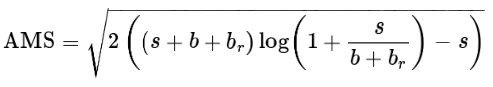

where

s, b : unnormalized true positive and false positive rates, respectively,
b_r =10 is the constant regularization term,
\\(\log\\) is the natural log.

More precisely, let \\((y_1, \ldots, y_n) \in \{\text{b},\text{s}\}^n\\) be the vector of true test labels, let \\((\hat{y}_1, \ldots, \hat{y}_n) \in \{\text{b},\text{s}\}^n\\) be the vector of predicted (submitted) test labels, and let \\((w_1, \ldots, w_n) \in {\mathbb{R}^+}^n\\) be the vector of weights. Then

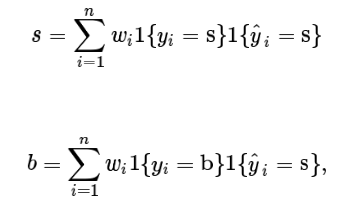

where the indicator function \\(\mathbb{1}\{A\}\\) is 1 if its argument \\(A\\) is true and 0 otherwise.

## DATASET DESCRIPTION
The dataset is tabular with 30 float feature columns, a textual label 's' or 'b', a weighted column and KaggleSet and KaggleWeight

Invalid values in the dataset appear as float of -999.0

In practise you need to select the feature columns manually, do your transforms(replace -999.0, normalization, ...) and during evaluation use the ASM metric with the cumulative KaggleWeight for 's' or 'b' classification

# SHALLOW MULTILAYER PERCEPTRON

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import time
import copy 
import math
from datetime import datetime
from torch.utils.data import DataLoader
%matplotlib_inline

In [ ]:
class Feedforward(torch.nn.Module):
    def __inti__(self,input_size, hidden_size, dropout):
        super(Feedforward, self.__init__)
        self.input_size= input_size
        self.hidden_size= hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
        #self.relu = torch.nn.ReLU()
        self.relu = torch.nn.LeakyReLU(0.1)
        self.fc_out = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        self.dropout = torch.nn.Dropout(dropout)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.relu(x)
        output = self.fc_out(x)
        output = self.sigmoid(output)
        return output

In [ ]:
data = pd.read_csv("D:\Anaconda Projects\Higgs Boson Machine Learning Challenge\atlas-higgs-challenge-2014-v2.csv)r
data['Binary_Label'] = data['Label'].map({'s':1, 'b':0})                   

In [ ]:
nonphi_columns = [c for c in data.columns if "phi" in c]
for col in nonphi_columns:
    data.drop(col, axis = 1, inplace = True )
data.head()    

We are deleting "phi" containing columns because angle "phi" has no correlation with scattering parameters in a beam

Good models to try: Decision Trees(Random Forest, Gradient-boosted trees), Support Vector Machines, Neural Nets

In [ ]:
# now replace all the '-999' values with NULL so we can properly handle then
# nulled_data = data.replace(-999.0, np.nan)
nulled_data = data.replace(-999.0, 0)
train_data = nulled_data.loc(nulled_data['KaggleSet'] == 't').copy(deep=True)
public_test_data = nulled_data.loc(nulled_data['KaggleSet'] == 'b').copy(deep=True)
private_test_data = nulled_data.loc(nulled_data['KaggleSet'] == 'v').copy(deep=True)

In [ ]:
len(private_test_data)

In [ ]:
orig_train_data = train_data.copy(deep = True)
orig_public_test_data = public_test_data.copy(deep = True)
orig_private_test_data = private_test_data.copy(deep = True)


# now replace the null values with column average
train_data.drop('EventId', axis=1, inplace = True)
train_data.drop('Label', axis=1, inplace = True)
train_data.drop('Binary_Label', axis=1, inplace = True)
train_data.drop('Weight', axis=1, inplace = True)
train_data.drop('KaggleWeight', axis=1, inplace = True)
train_data.drop('KaggleSet', axis=1, inplace = True)
for col in train_data:
    train_data[col].fillna(train_data[col].mean(), inplace = True)
# train_data.isnull().sum()


public_test_data.drop('EventId', axis=1, inplace = True)
public_test_data.drop('Label', axis=1, inplace = True)
public_test_data.drop('Binary_Label', axis=1, inplace = True)
public_test_data.drop('Weight', axis=1, inplace = True)
public_test_data.drop('KaggleWeight', axis=1, inplace = True)
public_test_data.drop('KaggleSet', axis=1, inplace = True)
for col in public_test_data:
    public_test_data[col].fillna(public_test_data[col].mean(), inplace = True)

    
private_test_data.drop('EventId', axis=1, inplace = True)
private_test_data.drop('Label', axis=1, inplace = True)
private_test_data.drop('Binary_Label', axis=1, inplace = True)
private_test_data.drop('Weight', axis=1, inplace = True)
private_test_data.drop('KaggleWeight', axis=1, inplace = True)
private_test_data.drop('KaggleSet', axis=1, inplace = True)
for col in private_test_data:
    private_test_data[col].fillna(private_test_data[col].mean(), inplace = True)    

In [ ]:
# now let's normalize
normed_train_data = (train_data - train_data.min())/(train_data.max() - train_data.min())
normed_public_test_data = (public_test_data - public_test_data.min())/(public_test_data.max() - public_test_data.min())
normed_private_test_data = (private_test_data - private_test_data.min())/(private_test_data.max() - private_test_data.min())

In [ ]:
train_input_data = []
for i in range(len(orig_train_data)):
    train_input_data.append([torch.tensor(normed_train_data.iloc[i], dtype = torch.float), torch.tensor(orig_train_data.iloc[i], dtype = torch.float)])
valid_input_data = []
for i in range(len(orig_public_test_data)):
    valid_input_data.append([torch.tensor(normed_public_test_data.iloc[i], dtype = torch.float), torch.tensor(orig_public_test_data.iloc[i], dtype = torch.float)])    

In [ ]:
len(valid_input_data)

In [ ]:
train_dataloader = DataLoader(train_input_data, batch_size=128, shuffle=True)
valid_dataloader = DataLoader(valid_input_data, batch_size=128, shuffle=True)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
model = Feedforward(24,600,0.05)
model.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # Stochastic Gradient Descent

In [ ]:
now = datetime.now()
dt_string = now.strftime("%d%m%Y%H%M%S")
logfile = open(dt_string + ". log",'w')
logfile.write(f"Start of Log\n")
logfile.write(f"Now training with device={device}\n")
logfile.write(f"Num Devices: {torch.cuda.device_count()}, DEVICE NAME 0: {torch.cuda.get_device_name(0)}\n")

start_time = time.time()
epoch = 25
maxvalcount = 5
minval_loss = np.inf
valcount = maxvalcount
best_model = model
logfile.write(f"Using model with params on CUDA: {next(model.parameters()).is_cuda}\n")
for epoch in range(epoch):
    outstring = f"EPOCH: {epoch}"
    print(outstring)
    logfile.write(outstring + '\n')
    model.train()
    for i,batch in enumerate(train_dataloader):
        inputs, output = batch
        inputs, output = inputs.to(device), output.to(device)
        optimizer.zero_grad()
        # Forward pass
        y_pred = model(inpputs)
        # Compute Loss
        loss = criterion(y_pred.squeeze(), output)
        if i%100 ==0:
            logstring = 'Batch: {}    train loss: {}'.format(i, loss.item())
            print(logstring)
            logfile.write(logstring + '\n')
        # Backward pass
        loss.backward()
        optimizer.step()
     # compute validation loss  
     model.eval()
     with torch.set_grad_enabled(False):
        val_loss = 0
        for i,batch in enumerate(valid_dataloader):
            inputs, output = batch
            inputs, output = inputs.to(device), output.to(device)
            y_pred = model(inputs)
            loss = criterion(y_pred.squeeze(), output)
            val_loss += loss
            if i%100 == 0:
                logstring = "Validation Batch: {}   loss: {}".format(i, loss.item())
                print(logstring)
                logfile.write(logstring + '\n')
        avg_val_loss = val_loss/ len(valid_dataloader)
        valstring = f"AVERAGE BATCH VAL LOSS = {avg_val_loss}"
        print(valstring)
        logfile.write(valstring + '\n')
     if avg_val_loss < minval_loss:
        minval_loss = avg_val_loss
        best_model = copy.deepcopy(model)
        valcount = maxvalcount
     else:
        valcount -= 1
     if valcount == 0:
        endmsg = f"Validation Loss failed to decrease in {maxvalcount} epochs, exiting with best model, val loss is {val_loss}"
        print(endmsg)
        logfile.write(endmsg + '\n')
        break
end_time = time.time()
timestring = f"Time elapsed in training: {end_time - start_time} seconds"
print(timestring)
logfile.write(timestring + '\n')

In [ ]:
torch.save(best_model, "D:/Anaconda Projects/Higgs Boson Machine Learning Challenge/mlp.shallow.600.nophi.pt")

In [ ]:
def AMS(s, b):
    ''' Approximate Median Significance defined as:
        AMS = sqrt(2{(s+b+b_r) log[1+ (s/(b+b_r))] -s})
    where b_r = 10, b = background, s = signal, log is natural logarithm '''
    
    br = 10.0
    radicand = 2 * ((s+b+br)* math.log(1.0 + s/(b+br)) -s)
    if radicand < 0:
        print('radicand is negative. Exiting')
    else:
        return math.sqrt(radicand)

In [ ]:
# Training performance
best_model.to("cpu")
best_model.eval()
y_pred = best_model(torch.tensor(normed_train_data.values, dtype=torch.float)).tolist()
y_gold = orig_train_data['Label']
y_weight = orig_train_data['KaggleWeight']
s = 0
b = 0
tp = 0
fp = 0
for i,y in enumerate(y_pred):
    if y[0] > 0.5:
        if y_gold.iloc[i] == 's':
            s += y_weight.iloc[i]
            tp += 1
        else:
            b += y_weight.iloc[i]
            fp += 1
out1 = f"TRAINING: (S,B) = ({s:.3f},{b:.3f}), (TP,FP) = ({tp},{fp})"
print(out1)
logfile.write(out1 + '\n')

outstring = f"TRAINING: (S,B) = ({s:.3f},{b:.3f}), AMS={AMS(s,b):.3f}, Unweighted Precision = {tp/(tp+fp):.3f}"
print(outstring)
logfile.write(outstring + '\n')

In [ ]:
# Validation performance
best_model.to("cpu")
best_model.eval()
y_pred = best_model(torch.tensor(normed_public_test_data.values, dtype=torch.float)).tolist()
y_gold = orig_public_test_data['Label']
y_weight = orig_public_test_data['KaggleWeight']
s = 0
b = 0
tp = 0
fp = 0
for i,y in enumerate(y_pred):
    if y[0] > 0.5:
        if y_gold.iloc[i] == 's':
            s += y_weight.iloc[i]
            tp += 1
        else:
            b += y_weight.iloc[i]
            fp += 1

outstring = f"VALID: (S,B) = ({s:.3f},{b:.3f}), AMS={AMS(s,b):.3f}, Unweighted Precision = {tp/(tp+fp):.3f}"
print(outstring)
logfile.write(outstring + '\n')

In [ ]:
# Testing performance
best_model.to("cpu")
best_model.eval()
y_pred = best_model(torch.tensor(normed_private_test_data.values, dtype=torch.float)).tolist()
y_gold = orig_private_test_data['Label']
y_weight = orig_private_test_data['KaggleWeight']
s = 0
b = 0
tp = 0
fp = 0
for i,y in enumerate(y_pred):
    if y[0] > 0.5:
        if y_gold.iloc[i] == 's':
            s += y_weight.iloc[i]
            tp += 1
        else:
            b += y_weight.iloc[i]
            fp += 1

outstring = f"TEST: (S,B) = ({s:.3f},{b:.3f}), AMS={AMS(s,b):.3f}, Unweighted Precision = {tp/(tp+fp):.3f}"
print(outstring)
logfile.write(outstring + '\n')

In [ ]:
logfile.close()